In [1]:
import pandas as pd
import researchpy as rp
import scipy.stats as st
from bioinfokit.analys import stat
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv(r'C:\Users\mahmoud\Downloads\serious-injury-outcome-indicators-2000-2020-CSV.csv')
df.head()

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
0,W_A11,2000-02,Moving average,59.666667,50.925823,68.407510,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
1,W_A11,2001-03,Moving average,60.000000,51.234775,68.765225,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
2,W_A11,2002-04,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
3,W_A11,2003-05,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
4,W_A11,2004-06,Moving average,61.333333,52.471252,70.195415,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  2748 non-null   object 
 1   Period            2748 non-null   object 
 2   Type              2748 non-null   object 
 3   Data_value        2748 non-null   float64
 4   Lower_CI          2748 non-null   float64
 5   Upper_CI          2748 non-null   float64
 6   Units             2748 non-null   object 
 7   Indicator         2748 non-null   object 
 8   Cause             2748 non-null   object 
 9   Validation        2748 non-null   object 
 10  Population        2748 non-null   object 
 11  Age               2748 non-null   object 
 12  Severity          2748 non-null   object 
dtypes: float64(3), object(10)
memory usage: 279.2+ KB


In [4]:
df.isnull().sum()/len(df)*100

Series_reference    0.0
Period              0.0
Type                0.0
Data_value          0.0
Lower_CI            0.0
Upper_CI            0.0
Units               0.0
Indicator           0.0
Cause               0.0
Validation          0.0
Population          0.0
Age                 0.0
Severity            0.0
dtype: float64

In [6]:
df_sample= df.sample(1000)
x= df_sample['Data_value']

In [14]:
rp.summary_cont(df['Data_value'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Data_value,2748.0,490.518,1407.6071,26.8518,437.8662,543.1697


## One-sample t-test with scipy

In [20]:
alpha= 0.05
stat, p= st.ttest_1samp(x, popmean= 490)

print('stats= {0:.3f}'.format(stat),"&" ,'p =', p, '\n')

if p > alpha:
    print('there is not significance difference between the population mean and the sample mean')
else:
    print('there is significance difference between the population mean and the sample mean')

stats= -0.842 & p = 0.40019542475300673 

there is not significance difference between the population mean and the sample mean


## One-sample t-test with bioinfokit

In [17]:
from bioinfokit.analys import stat

a = stat()
a.ttest(df_sample, test_type=1, res='Data_value', mu= 490)
print(a.summary)


One Sample t-test 

------------------  -----------
Sample size         1000
Mean                 454.505
t                     -0.841632
Df                   999
P-value (one-tail)     0.200098
P-value (two-tail)     0.400195
Lower 95.0%          371.745
Upper 95.0%          537.265
------------------  -----------


## check for normality assumption
+ run shapiro test for normality.

stats= 0.346 & p = 0.0 

Probably NOT Gaussian


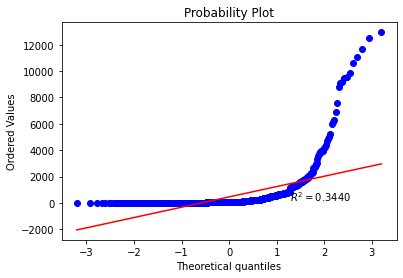

In [18]:
stat, p = st.shapiro(x)
print('stats= {0:.3f}'.format(stat),"&" ,'p =', p,'\n')

if p > alpha:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')
    
norm, stat= st.probplot(df_sample['Data_value'],plot=plt, rvalue=True)

---
+ since we had shapiro test results and (PPCC) plot that indicated non-normality <br /> then we will run alternative test call wilcoxon signed rank test.

## applying wilcoxon signed rank test.

In [19]:
stat, p= st.wilcoxon(x - 490)

print('stats= {0:.3f}'.format(stat),"&" ,'p =', p,'\n')

if p > alpha:
    print('there is not significance difference between the population median and the sample mean')
else:
    print('there is significance difference between the population median and the sample mean')

stats= 104337.000 & p = 2.002796541700993e-57 

there is significance difference between the population mean and the sample mean


## Interpretation.
> since our data is not normally distributed and stats_test = 104337.000 , p_value = 2.002796541700993e-57 There is a statistically significant difference between the sample medain and population median.